In [10]:
#import the files 
import re 
import nltk
import ssl
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import scipy.stats as ss
import seaborn as sns 

In [11]:
cv = CountVectorizer()
train_data_2 = pd.read_csv('training_set.csv')
test_data = pd.read_csv('testing_set.csv')

X_train = cv.fit_transform(train_data_2["Review"]).toarray()
y_train = train_data_2["Liked"].values

X_test = cv.transform(test_data["Review"]).toarray()
y_test = test_data["Liked"].values

#train the model 
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(y_test,y_pred)

score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[114  21]
 [ 38 127]]


Accuracy is  80.33 %
Precision is  0.86
Recall is  0.77


In [12]:
#import the resturant data and reviews 
business = pd.read_csv("cleaned_business.csv")
reviews = pd.read_csv("cleanish_reviews.csv") 
ids = pd.read_csv('list_buiss_id.txt', sep=" ", header=None)
ids.columns = ["id"]




In [13]:
columns = ["business_id", "business_name", "our_score", "stars"]
final_results = pd.DataFrame(columns=columns)

In [14]:
for i in range(len(ids)): 
    id_curr = ids.iloc[i].id
    
    
    #Review data that matches the current business id 
    all_reviews = reviews[reviews["business_id"] == id_curr]
    print(all_reviews["text"])
    #vectorize the reviews for that resturant 
    X_test = cv.transform(all_reviews["text"]).toarray()

    #creates the predicted sentiment for each review 
    y_pred = classifier.predict(X_test)
    #you dont have to round 
    y_pred = np.mean(y_pred)*100
    #get the row in dataframe of current buis 
    curr_buis = business.loc[business['business_id'] == id_curr]
    #modify the star ratings to the same scale 
    curr_star = (curr_buis["stars"].values[0]/5)*100
    #update the final dataframe with all the info 
    
    final_results = final_results.append({"business_id":id_curr, "business_name":curr_buis["name"].values[0],"our_score":y_pred, "stars":curr_star}, ignore_index = True)
    

4420    Finally got a chance to try Hwy 55 and I was v...
4422    My third time here, and there are some serious...
4423    Not a good first experience. After entering an...
4424    Their food and milk shakes are so gross here. ...
4432    Very unprofessional service for lackluster bur...
                              ...                        
5805    Well came in sat at the bar , even asked the w...
5811    I hate that the service is so bad here. The fo...
5843    Ok, sorry but I was so unimpressed and disappo...
5849    Overpriced, and fries do not come with the mea...
5877    Ok with the good. They are family friendly, A ...
Name: text, Length: 74, dtype: object
10499    I visited the Eagles Buffet on a Friday about ...
10500    I have been here numerous times and each time ...
10519    I am really disappointed in the Friday night s...
10593    The Friday night seafood buffet is excellent i...
10619    The price is extremely good. I ate crablegs he...
                             

14985    I visited this place with my friends last nigh...
14991    Such a pleasant surprise once you walk in the ...
15001    This Thai restaurant boasts an authentic taste...
15020    EXCELLENT. Every time we go there we end up st...
15033    I absolutely love this place! The decor and th...
15070    The owner had the audacity to tell me I must h...
15074    It's ok.. nothing compared to Toronto Thai foo...
15082    Food is consistently good in Orchid Thai. My f...
15119    Pad Thai and Shrimp Chips are authentic. Thai ...
15222    One of the better oriental restaurants in the ...
15223    There are so many good Asian restaurants aroun...
15245    Been here on a number of occasions. The atmosp...
15273    This is not an update; this is a response to t...
15285    Has turned into one of my favourite go to take...
15286    Was looking for a lunch spot in Aurora today a...
15287    This is hands down the best Thai food in York ...
15301    First time trying Orchid Thai.  Was very impre.

1       We arrived for our reservation at 7:15pm.  The...
31      not that impressed. I really wanted pancakes f...
50      Ugg the service and food was just awful.Last t...
58      BOGO....I find that when a server is inefficie...
65      The last time I went to Mimi's Cafe, at 7450 W...
                              ...                        
1907    Sunday (6/8/2014) my sister & I took my mother...
1908    My grandmother in law requested this place for...
1913    Okay where to start. We arrived at 7 am when t...
1923    KiDisappointed. First of all prices are more t...
1929    Went on Sunday at 6p. Dead quiet. Booth leathe...
Name: text, Length: 199, dtype: object
3       This place is a Quebec chain. The restos are c...
94      The food has gone downhill. We ordered French ...
101     Good, but expensive for what it is.\n\nThe sel...
151     bieres, moules & frites. Voila les 3 mots décr...
172     Service was friendly and with a smile. I had t...
278     Came here for the mussels

4418    My fiancé and I went to Denny's while in Tempe...
4448    This Dennys is pure trash. We don't go to Denn...
4477    This is the worst Denny's I have ever visited....
4484    Sitting here for bout 20 min n no food the lad...
4499    I really like this Denny's team. Always nice a...
4525    Ok the service was not the best, prices r a li...
4531    I hesitate to write a review for a national ch...
4610    After driving around for awhile, me and the fa...
4615    Super clean Denny's. Coffee is always great an...
4642    Ordered a Avocado Chicken w/o mayo Sandwich fo...
4705    Came in for breakfast on a Sunday morning arou...
4727    I didn't have the greatest experience. I waite...
4736    The staff here is amazing! We try to get in Ma...
4737    Dennys staff could not have been nicer! We wen...
4740    this location reminds me of dave chapelle's po...
4770    Super nice and friendly employees! Great food!...
4779    Wow!! Absolutely gross... this place doesnt lo...
4795    I thou

5894    Kristopher's is a divey sports bar located in ...
5895    Huge variety of food and it's is very good, en...
5923    Some of the best wings in town. Nice beer vari...
5925    For better or worse, we tend to get to Kristop...
5942    I really really love this place and have for y...
                              ...                        
7094    We are local residents who have been here many...
7136    Good spot to catch a game and enjoy some beers...
7138    Bar service was amazing. And the food was perf...
7181    Love this place. The food is really good. The ...
7184    Reliable food, family-friendly.  Huge menu.  P...
Name: text, Length: 94, dtype: object
5958    Came here with a friend on a Friday afternoon ...
5978    First part of December went to this place to h...
5979    Favorite are the beer battered chicken strips ...
6012    I love this place. Been here countless times f...
6071    I went here for a birthday party last night an...
6088    Went in for prime rib last

13471    This is a nice little spot in the city. An oka...
13475    GREAT food, GREAT service. Better experience t...
13478    Delicious Ethiopian food.  If you've never tri...
13488    It left me with a sour taste in my mouth. No p...
13510    I've been to quite a few Ethiopian restaurants...
                               ...                        
14885    Words cannot describe the excitement that bubb...
14910    I have come here a few times for lunch or an e...
14938    Went here again this past wekeend!  Everytime ...
14959    Update...I heard that they were closed so I ha...
14963    Buffett with five standard but very flavorful ...
Name: text, Length: 108, dtype: object
7222    Very rude when I called, young girl asked me m...
7237    Extremely rude. I had problems ordering online...
7249    Let me start by saying, I like to pick out my ...
7252    This place sucks. No pickles?  They give you a...
7262    This location is horrible, and the employees a...
                      

3300    I always love to come here for the rock shrimp...
3314    It was totally chaos and mass confusion and I ...
3332    Seriously Ichiban.\nPlease cut UP the iceberg ...
3337    Brought my mom here for her first hibachi expe...
3369    I went mid week, I was worried because it was ...
3371    While you get a lot if food, the quality of th...
3406    My husband and I have been coming here since t...
3449    Enjoyable place to get hibachi. I have only ev...
3459    The sushi is always always delicious. But, aft...
3468    Great sushi. Great service. Fun chefs. Perfect...
3492    The food was very good, but the seizure-induci...
3506    This is probably the best Ichiban Steakhouse &...
3524    I've been to their other location so I decided...
3525    I've eaten at a lot of Japanese Steakhouses an...
3553    We have dined at Ichiban several times in the ...
3624    OK for a hibachi grill, food was good but the ...
3657    By far the best steak house and hibachi i have...
3669    We are

Name: text, Length: 385, dtype: object
3256    Great place! Food was very fresh and super tas...
3257    I love Ricky's. The food is high quality and v...
3260    New place in the entertainment district of Sco...
3288    It's basically a sit down Taco Bell. Orders ca...
3290    No thank you! \n\nThis was a disappointing exp...
                              ...                        
4342    We were he only two in the place on a rainy Su...
4354    You will not think you are in a taco place at ...
4366    Terrible service. We waited 15 minutes to have...
4379    One of the best Mexican restaurants I have bee...
4385    This place is awesome I just tried" tacos del ...
Name: text, Length: 90, dtype: object
1973    Awesome place for rolls, the staff is really c...
1974    My sister recommended this place and we though...
1975    I have to say this place is very meh.  It is a...
1978    Moved to Las Vegas almost a year ago from Hawa...
1996    Honestly, this was the most disgusting sushi 

4425    Lazeez was great! The falafel and baba ganoush...
4431    Lazeez was absolutely fantastic! We had the gy...
4433    Loveeee this place. We had been passing it on ...
4434    I can't say enough about this place. The waitr...
4446    Excellent food and excellent service! The baba...
                              ...                        
5868    Second and last time I will order from here.  ...
5874    This restaurant is one of my favorite. They ha...
5886    Came one day after class. Very friendly people...
5891    This definitely went above and beyond my expec...
5893    This was my first time visiting this restauran...
Name: text, Length: 124, dtype: object
10511    I searched for a great seafood restaurant in T...
10515    We went on a Sunday - it's the old Starfish. S...
10538    I come here for brunch every now and then and ...
10548    I didn't like that. I tried much better seafoo...
10557    Great friendly staff and cool environment but ...
                            

15015    Great neighborhood Bar, food is good, lots of ...
15018    Katie the bartender is the best. I go out of m...
15019    This is a great neighborhood bar, friendly peo...
15027    Love going to happy hour here! Mostly because ...
15030    First time here.  We WILL be back!!! Especiall...
                               ...                        
15835    Local Dive Bar smells like years of use when y...
15862    This was the first time my buddy and I visited...
15868    Met a friend there on a Friday afternoon about...
15891    Looking for a burger and beer and went to a ne...
15903    I love this bar because it has some of the bes...
Name: text, Length: 66, dtype: object
10516    I've been wanting to review Katz for a while, ...
10523    Looking forward to a NY deli experience??? We'...
10529    Had been meaning to try this place for a coupl...
10579    simple;\n\nBEST DELI IN CHARLOTTE...way the F ...
10687    I love Katz's Deli! The service is great the c...
                  

In [15]:
final_results.head()

,business_id,business_name,our_score,stars
0,s2B_ZeSGTlQ3qbm0dOY5rg,Hwy 55 Burgers Shakes & Fries,39.189189,60.0
1,tYYJYqbw1zasFUCqrkawKQ,Eagles Buffet,52.777778,70.0
2,wtDLILBaj5BGEbYvWGfNUw,Duck Donuts,71.666667,80.0
3,Mnu3EPpuzu3UUN1PIwFRoQ,Maui Pasta,82.692308,90.0
4,MrSHPvHVdE_VzVN7iRz45Q,Enso Asian Bistro & Sushi Bar,51.014493,70.0


In [16]:
# Find the correlation
ss.pearsonr(final_results["our_score"], final_results["stars"])

(0.861028993493147, 1.54842004247499e-30)

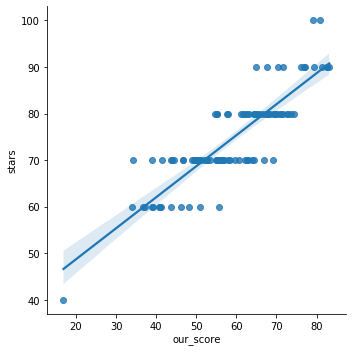

In [17]:
#visualize the correlation so we can insert into the paper 
g = sns.lmplot(x="our_score", y="stars", data=final_results)

In [18]:
final_results.filter(items=["our_score",'stars']).corr()

,our_score,stars
our_score,1.000000,0.861029
stars,0.861029,1.000000
